# Retail Dataset - Data Exploration
Exploration of the retail customer churn dataset for regression task.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
plt.style.use('default')

In [2]:
# Load the dataset with correct path
df = pd.read_csv('../data/train_data.csv')
print(f"Dataset shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

Dataset shape: (800000, 77)
Memory usage: 1905.75 MB


In [3]:
# Dataset overview
print("Dataset Info:")
df.info()
print("\nFirst few rows:")
df.head()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 77 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   age                        800000 non-null  int64  
 1   gender                     800000 non-null  object 
 2   income_bracket             800000 non-null  object 
 3   loyalty_program            800000 non-null  object 
 4   membership_years           800000 non-null  int64  
 5   churned                    800000 non-null  object 
 6   marital_status             800000 non-null  object 
 7   number_of_children         800000 non-null  int64  
 8   education_level            800000 non-null  object 
 9   occupation                 800000 non-null  object 
 10  transaction_id             800000 non-null  int64  
 11  transaction_date           800000 non-null  object 
 12  product_id                 800000 non-null  int64  
 13  product_categor

,age,gender,income_bracket,loyalty_program,membership_years,churned,marital_status,number_of_children,education_level,occupation,transaction_id,transaction_date,product_id,product_category,quantity,unit_price,discount_applied,payment_method,store_location,transaction_hour,day_of_week,week_of_year,month_of_year,avg_purchase_value,purchase_frequency,last_purchase_date,avg_discount_used,preferred_store,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_name,product_brand,product_rating,product_review_count,product_stock,product_return_rate,product_size,product_weight,product_color,product_material,product_manufacture_date,product_expiry_date,product_shelf_life,promotion_id,promotion_type,promotion_start_date,promotion_end_date,promotion_effectiveness,promotion_channel,promotion_target_audience,customer_zip_code,customer_city,customer_state,store_zip_code,store_city,store_state,distance_to_store,holiday_season,season,weekend,customer_support_calls,email_subscriptions,app_usage,website_visits,social_media_engagement,days_since_last_purchase
0,41,Female,Medium,No,3,No,Married,0,Bachelor's,Employed,237855,2020-03-16 03:30:43,997,Electronics,7,960.62,0.24,Credit Card,Location C,0,Tuesday,48,11,115.65,Daily,2021-08-28 08:56:55,0.50,Location A,90,11,6.66,213.48,6,415.26,5520.95,50,218,292.80,918.64,791.91,0.77,Product D,Brand Y,3.3,484,33,0.16,Large,8.46,Red,Glass,2018-11-23 05:41:47,2023-11-06 08:35:21,151,165,Flash Sale,2021-03-06 17:48:14,2022-06-09 10:09:31,Low,Online,Returning Customers,93643,City D,State X,47303,City D,State X,72.83,No,Summer,No,18,No,Medium,2,Medium,6
1,40,Female,High,Yes,4,Yes,Single,4,PhD,Employed,500661,2020-03-27 15:43:13,2869,Electronics,5,219.52,0.46,Cash,Location C,12,Friday,19,6,178.60,Daily,2021-11-25 01:23:16,0.33,Location C,13,90,2.30,328.55,7,873.29,6591.58,45,499,589.92,146.79,936.69,0.81,Product B,Brand X,3.8,121,78,0.39,Small,5.72,White,Plastic,2019-07-31 07:13:54,2022-03-08 04:29:27,171,341,20% Off,2021-04-23 10:19:10,2022-02-04 22:06:28,Medium,Online,New Customers,22286,City A,State Y,22534,City B,State Z,44.60,Yes,Fall,No,16,Yes,Low,17,Medium,137
2,48,Male,High,No,4,Yes,Married,3,Bachelor's,Unemployed,432552,2020-05-18 05:44:52,6172,Clothing,8,759.95,0.11,Debit Card,Location C,22,Sunday,1,1,205.62,Yearly,2021-02-09 16:28:15,0.12,Location A,36,13,2.41,188.58,7,751.34,8275.06,86,83,998.98,198.22,706.40,6.01,Product C,Brand X,3.4,852,71,0.17,Medium,4.98,Black,Wood,2018-04-30 17:18:19,2022-08-23 19:20:55,118,149,Buy One Get One Free,2021-06-06 02:39:27,2022-01-04 00:02:46,Medium,Online,Returning Customers,60098,City C,State Z,96309,City B,State Y,46.15,Yes,Winter,Yes,11,Yes,High,68,High,275
3,19,Male,Low,No,9,Yes,Divorced,3,Bachelor's,Retired,771343,2021-10-24 19:07:04,6004,Clothing,9,862.15,0.44,Debit Card,Location C,11,Tuesday,36,3,30.49,Weekly,2021-05-17 11:48:04,0.23,Location D,9,19,7.83,62.00,9,478.40,6568.88,35,13,88.83,296.81,142.16,4.81,Product C,Brand X,2.1,850,36,0.40,Large,5.10,Black,Glass,2019-12-07 22:07:35,2022-11-02 21:50:32,296,724,Buy One Get One Free,2021-06-12 18:48:38,2022-08-05 01:28:06,High,Social Media,Returning Customers,65565,City A,State Z,10891,City C,State Y,0.62,No,Fall,No,15,Yes,Medium,61,Low,182
4,53,Female,Low,Yes,8,No,Divorced,2,Master's,Employed,186219,2021-01-06 16:42:43,3565,Groceries,3,609.81,0.19,Cash,Location C,11,Sunday,42,2,199.61,Weekly,2021-11-29 11:37:34,0.19,Location A,57,88,9.29,113.81,1,727.89,5978.01,29,245,780.12,540.88,107.28,1.08,Product A,Brand X,2.7,340,43,0.25,Medium,8.80,Blue,Metal,2018-09-28 00:06:47,2023-06-16 00:59:57,356,68,Buy One Get One Free,2021-03-31 12:26:38,2022-08-28 19:55:06,High,In-store,New Customers,51829,City A,State Z,78871,City A,State Z,38.09,Yes,Fall,Yes,0,Yes,High,19,High,330


Target Variable Analysis - 'churned':
churned
No     400404
Yes    399596
Name: count, dtype: int64

Churn rate: 49.95%


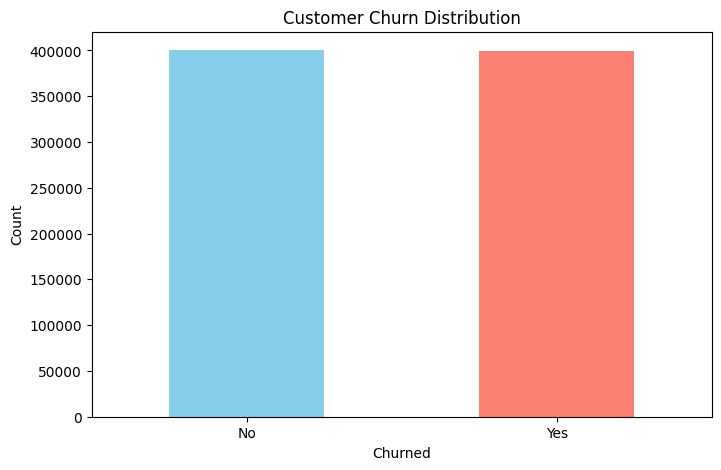

In [4]:
# Target variable analysis
print("Target Variable Analysis - 'churned':")
print(df['churned'].value_counts())
print(f"\nChurn rate: {df['churned'].value_counts(normalize=True)['Yes']:.2%}")

# Visualize target distribution
plt.figure(figsize=(8, 5))
df['churned'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Customer Churn Distribution')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

In [5]:
# Missing values analysis
print("Missing Values Analysis:")
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)
print(missing_df if len(missing_df) > 0 else "No missing values found!")

Missing Values Analysis:
No missing values found!


In [6]:
# Data types summary
print("Data Types Summary:")
dtype_counts = df.dtypes.value_counts()
print(dtype_counts)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical columns ({len(numerical_cols)}): {numerical_cols[:10]}...")
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols[:10]}...")

Data Types Summary:
object     38
int64      23
float64    16
Name: count, dtype: int64

Numerical columns (39): ['age', 'membership_years', 'number_of_children', 'transaction_id', 'product_id', 'quantity', 'unit_price', 'discount_applied', 'transaction_hour', 'week_of_year']...
Categorical columns (38): ['gender', 'income_bracket', 'loyalty_program', 'churned', 'marital_status', 'education_level', 'occupation', 'transaction_date', 'product_category', 'payment_method']...


In [7]:
# Statistical summary for numerical features
print("Statistical Summary - Numerical Features:")
df[numerical_cols].describe()

Statistical Summary - Numerical Features:


,age,membership_years,number_of_children,transaction_id,product_id,quantity,unit_price,discount_applied,transaction_hour,week_of_year,month_of_year,avg_purchase_value,avg_discount_used,online_purchases,in_store_purchases,avg_items_per_transaction,avg_transaction_value,total_returned_items,total_returned_value,total_sales,total_transactions,total_items_purchased,total_discounts_received,avg_spent_per_category,max_single_purchase_value,min_single_purchase_value,product_rating,product_review_count,product_stock,product_return_rate,product_weight,product_shelf_life,promotion_id,customer_zip_code,store_zip_code,distance_to_store,customer_support_calls,website_visits,days_since_last_purchase
count,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000,800000.000000
mean,48.489880,4.498445,1.999791,499796.925741,4999.302701,5.003425,500.120805,0.250013,11.508469,26.501809,6.498336,254.862712,0.250039,49.430262,49.507086,5.498809,255.132261,4.500239,500.347170,5055.268567,49.996240,249.892770,499.714733,505.029678,504.780814,5.041978,2.999388,499.119802,49.519503,0.250098,5.056466,181.891146,499.726743,55002.041589,54963.376260,50.011425,9.498734,49.511601,182.076024
std,17.868101,2.872934,1.414198,288558.279459,2887.681227,2.583392,288.440234,0.144315,6.925024,15.005291,3.455155,141.448107,0.144415,28.862543,28.880181,2.598030,141.397745,2.873244,288.769942,2859.179362,28.571437,144.064918,288.539410,286.126428,286.028788,2.854903,1.154698,288.443340,28.871694,0.144413,2.857353,105.272243,288.542749,25981.823465,25975.911014,28.863479,5.761851,28.864197,105.348022
min,18.000000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,0.000000,100.010000,1.000000,1.000000,0.000000,10.000000,10.000000,0.100000,1.000000,0.000000,0.000000,0.000000,0.100000,0.000000,1.000000,10000.000000,10000.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,2.000000,1.000000,249944.000000,2495.000000,3.000000,250.130000,0.130000,5.000000,14.000000,3.000000,132.310000,0.130000,24.000000,24.000000,3.250000,132.550000,2.000000,250.540000,2576.257500,25.000000,125.000000,249.810000,257.060000,256.567500,2.570000,2.000000,250.000000,25.000000,0.130000,2.580000,91.000000,250.000000,32464.000000,32484.000000,25.000000,4.000000,25.000000,91.000000
50%,49.000000,4.000000,2.000000,499641.500000,4999.000000,5.000000,500.120000,0.250000,12.000000,27.000000,7.000000,255.000000,0.250000,49.000000,50.000000,5.500000,255.270000,4.000000,500.105000,5059.140000,50.000000,250.000000,499.510000,504.765000,504.890000,5.040000,3.000000,499.000000,49.000000,0.250000,5.060000,182.000000,500.000000,54997.000000,54933.000000,50.010000,9.000000,50.000000,182.000000
75%,64.000000,7.000000,3.000000,749525.250000,7501.000000,7.000000,749.940000,0.370000,18.000000,39.000000,10.000000,377.180000,0.380000,74.000000,75.000000,7.750000,377.620000,7.000000,750.520000,7533.960000,75.000000,375.000000,749.500000,753.052500,752.850000,7.510000,4.000000,749.000000,75.000000,0.380000,7.530000,273.000000,750.000000,77507.000000,77442.000000,74.990000,14.000000,75.000000,273.000000
max,79.000000,9.000000,4.000000,999999.000000,9999.000000,9.000000,1000.000000,0.500000,23.000000,52.000000,12.000000,500.000000,0.500000,99.000000,99.000000,10.000000,500.000000,9.000000,1000.000000,9999.980000,99.000000,499.000000,1000.000000,1000.000000,1000.000000,10.000000,5.000000,999.000000,99.000000,0.500000,10.000000,364.000000,999.000000

In [8]:
# Key categorical features analysis
key_categorical = ['gender', 'income_bracket', 'loyalty_program', 'marital_status', 
                   'education_level', 'product_category', 'payment_method']

print("Key Categorical Features Analysis:")
for col in key_categorical:
    if col in df.columns:
        print(f"\n{col.upper()}:")
        print(df[col].value_counts().head())
        print(f"Unique values: {df[col].nunique()}")

Key Categorical Features Analysis:

GENDER:
gender
Female    267136
Other     267045
Male      265819
Name: count, dtype: int64
Unique values: 3

INCOME_BRACKET:
income_bracket
High      266955
Medium    266868
Low       266177
Name: count, dtype: int64
Unique values: 3

LOYALTY_PROGRAM:
loyalty_program
No     400461
Yes    399539
Name: count, dtype: int64
Unique values: 2

MARITAL_STATUS:
marital_status
Divorced    267009
Married     266604
Single      266387
Name: count, dtype: int64
Unique values: 3

EDUCATION_LEVEL:
education_level
Bachelor's     200528
PhD            200016
High School    199908
Master's       199548
Name: count, dtype: int64
Unique values: 4

PRODUCT_CATEGORY:
product_category
Toys           160685
Groceries      160261
Clothing       159805
Electronics    159677
Furniture      159572
Name: count, dtype: int64
Unique values: 5

PAYMENT_METHOD:
payment_method
Credit Card       200196
Cash              200053
Mobile Payment    199956
Debit Card        199795
Name: 

Correlation Analysis for: ['age', 'membership_years', 'number_of_children', 'transaction_id', 'product_id', 'quantity', 'unit_price', 'discount_applied', 'transaction_hour', 'week_of_year']


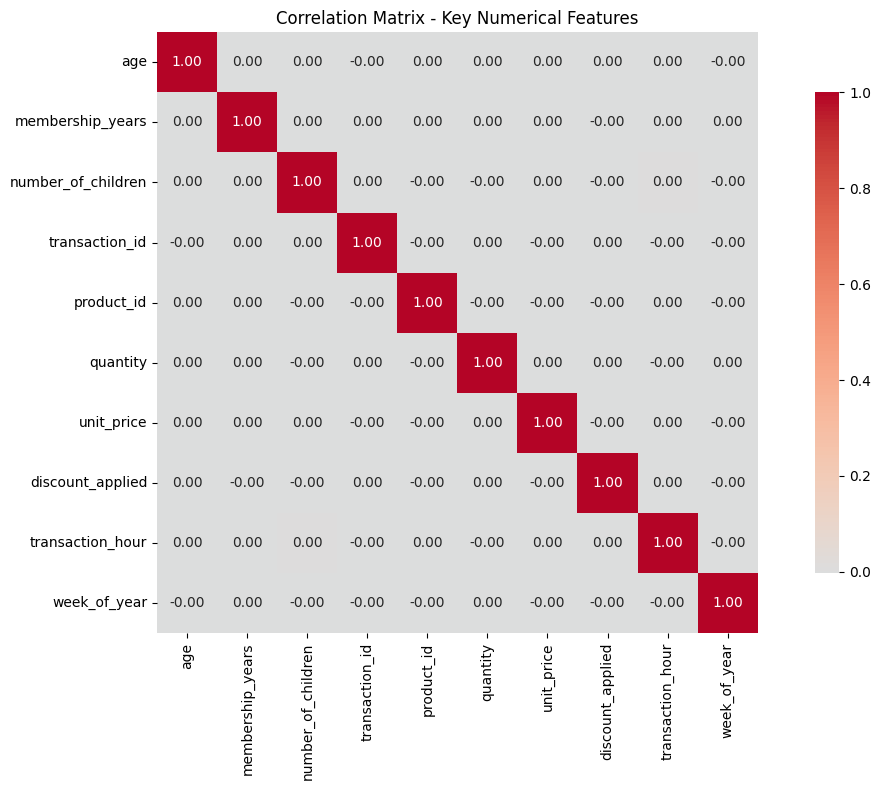

In [9]:
# Correlation analysis for key numerical features
key_numerical = ['age', 'membership_years', 'avg_purchase_value', 'purchase_frequency_encoded',
                'total_sales', 'customer_support_calls', 'days_since_last_purchase']

# Create a subset with available numerical columns
available_numerical = [col for col in key_numerical if col in numerical_cols]
if len(available_numerical) < len(key_numerical):
    # Use first 10 numerical columns if key ones not available
    available_numerical = numerical_cols[:10]

print(f"Correlation Analysis for: {available_numerical}")

# Calculate correlation matrix
corr_matrix = df[available_numerical].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.2f', cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix - Key Numerical Features')
plt.tight_layout()
plt.show()

Working with sample of 10000 rows for visualizations


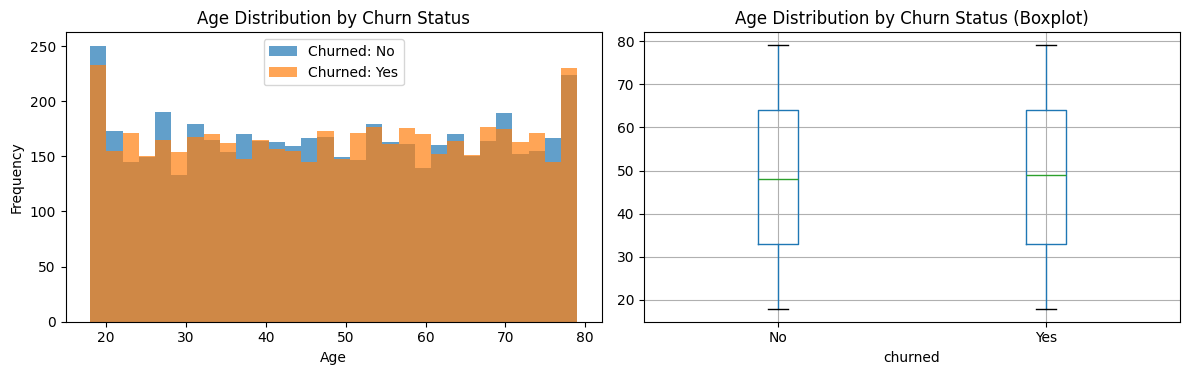

In [10]:
# Sample data for quick analysis (to avoid memory issues)
sample_size = 10000
df_sample = df.sample(n=sample_size, random_state=42)
print(f"Working with sample of {sample_size} rows for visualizations")

# Age distribution by churn status
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
for churn_status in df_sample['churned'].unique():
    subset = df_sample[df_sample['churned'] == churn_status]
    plt.hist(subset['age'], alpha=0.7, label=f'Churned: {churn_status}', bins=30)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Churn Status')
plt.legend()

plt.subplot(1, 2, 2)
df_sample.boxplot(column='age', by='churned', ax=plt.gca())
plt.title('Age Distribution by Churn Status (Boxplot)')
plt.suptitle('')  # Remove default title

plt.tight_layout()
plt.show()

In [11]:
# Summary insights
print("=" * 60)
print("DATASET SUMMARY INSIGHTS")
print("=" * 60)
print(f"• Dataset size: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"• Target variable: 'churned' with {df['churned'].nunique()} unique values")
print(f"• Churn rate: {(df['churned'] == 'Yes').mean():.1%}")
print(f"• Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
print(f"• Data types: {len(numerical_cols)} numerical, {len(categorical_cols)} categorical")
print(f"• Missing values: {'None' if df.isnull().sum().sum() == 0 else df.isnull().sum().sum()}")
print("\n• Key features for modeling:")
print("  - Customer demographics: age, gender, income_bracket")
print("  - Purchase behavior: avg_purchase_value, total_sales, purchase_frequency")
print("  - Engagement: customer_support_calls, days_since_last_purchase")
print("  - Product preferences: product_category, payment_method")
print("\n• Recommendations:")
print("  - Use sampling for faster model training (large dataset)")
print("  - Apply feature engineering for categorical variables")
print("  - Consider feature selection due to high dimensionality")
print("  - Monitor for class imbalance in target variable")

DATASET SUMMARY INSIGHTS
• Dataset size: 800,000 rows × 77 columns
• Target variable: 'churned' with 2 unique values
• Churn rate: 49.9%
• Memory usage: 1905.8 MB
• Data types: 39 numerical, 38 categorical
• Missing values: None

• Key features for modeling:
  - Customer demographics: age, gender, income_bracket
  - Purchase behavior: avg_purchase_value, total_sales, purchase_frequency
  - Engagement: customer_support_calls, days_since_last_purchase
  - Product preferences: product_category, payment_method

• Recommendations:
  - Use sampling for faster model training (large dataset)
  - Apply feature engineering for categorical variables
  - Consider feature selection due to high dimensionality
  - Monitor for class imbalance in target variable
